# Intrusion Detection System

Abstract 
--------

Security and privacy of a system is compromised, when an intrusion happens. Intrusion Detection System (IDS) plays vital role in network security as it detects various types of attacks in network. So here, we are going to propose Intrusion Detection System using machine learning algorithms. The proposed system will be done by conducting some experiments using [NSL-KDD Cup’99](http://nsl.cs.unb.ca/NSL-KDD/) dataset which is improved version of [KDD Cup’99 data set](http://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data).

Data Mining Process
------------------- 
The [Cross Industry Standard Process for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining) introduced a process model for data mining in 2000 that has become widely adopted.

<a href="https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining"> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/479px-CRISP-DM_Process_Diagram.png" title="Cross Industry Standard Process for Data Mining" alt="CRISP-DM_Process_Diagram"/></a>



The model emphasizes the ***iterative*** nature of the data mining process, distinguishing several different stages that are regularly revisited in the course of developing and deploying data-driven solutions to business problems
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Deployment

# Business Understanding

Nowadays the cyber security threats are rising and putting in risk a great number of organizations. Any organization could be a target for the attackers that produce huge damages into it.

For these reasons it's necessary to provide a system that help to detect intruders in a network. This intrusion detection system should be non-invasive to other systems to provide a quick deployment and to get results a soon as possible. 

It's also important to balance the number of false positives (that increase the maintenance of the system) with the number of false negatives (that would allow to intruders achieve their objectives)

# Data Understanding

**KDD Cup'99 data set** used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between **``bad'' connections**, called intrusions or attacks, and **``good'' normal connections**. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

**NSL-KDD** is a data set suggested to solve some of the inherent problems of the KDD'99 data set. Although, this new version of the KDD data set still suffers from some of the problems and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

* DOS: denial-of-service, e.g. syn flood;
* R2L: unauthorized access from a remote machine, e.g. guessing password;
* U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
* probing: surveillance and other probing, e.g., port scanning.

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only. 

### Derived Features ###

Higher-level features had been defined that help in distinguishing *normal* connections from *attacks*.  There are several categories of derived features.

**Intrinsic attributes**

These attributes are extracted from the headers' area of the network packets.

Col|Feature name  | description |	type
---|--------------|-------------|------------
1  |duration 	  |length (number of seconds) of the connection |continuous
2  |protocol_type |type of the protocol, e.g. tcp, udp, etc. |discrete
3  |service 	  |network service on the destination, e.g., http, telnet, etc. |discrete
4  |flag 	      |normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR 	|discrete 
5  |src_bytes 	  |number of data bytes from source to destination 	|continuous
6  |dst_bytes 	  |number of data bytes from destination to source 	|continuous
7  |land 	      |1 if connection is from/to the same host/port; 0 otherwise 	|discrete
8  |wrong_fragment|sum of bad checksum packets in a connection 	|continuous
9  |urgent 	      |number of urgent packets. Urgent packets are packets with the urgent bit activated 	|continuous



**Content attributes** 

These attributes are extracted from the contents area of the network packets based on expert person knowledge.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
10 |hot 	              |sum of hot actions in a connection such as: entering a system direc- tory, creating programs and executing programs	|continuous
11 |num_failed_logins 	  |number of failed login attempts 	|continuous
12 |logged_in 	          |1 if successfully logged in; 0 otherwise 	|discrete
13 |num_compromised 	  |number of "compromised" conditions 	|continuous
14 |root_shell 	          |1 if root shell is obtained; 0 otherwise 	|discrete
15 |su_attempted 	      |1 if "su root" command attempted; 0 otherwise 	|discrete
16 |num_root 	          |number of "root'" accesses 	|continuous
17 |num_file_creations 	  |number of file creation operations 	|continuous
18 |num_shells 	          |number of shell prompts 	|continuous
19 |num_access_files 	  |number of operations on access control files 	|continuous
20 |num_outbound_cmds	  |number of outbound commands in an ftp session 	|continuous
21 |is_hot_login 	      |1 if the login belongs to the "hot" list; 0 otherwise 	|discrete
22 |is_guest_login 	      |1 if the login is a "guest" login; 0 otherwise 	|discrete

**Traffic attributes**

These attributes are calculated taking into account the previous connections. 9+10 attributes are divided into two groups: (1) time traffic features (2) machine traffic features. The difference between one group and the other is the mode to select the previous connections.


*Time traffic attributes*

To calculate these attributes we considered the connections that occurred in the past 2 seconds.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
23 |count 	              |sum of connections to the same destination IP address |continuous
24 |srv_count 	          |sum of connections to the same destination port number |continuous
25 |serror_rate 	      |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)|continuous
26 |srv_serror_rate 	  |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)|continuous
27 |rerror_rate 	      |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)|continuous
29 |same_srv_rate 	      |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)|continuous
28 |srv_rerror_rate 	  |the percentage of connections that were to the same service, among the connections aggregated in count (23)|continuous
30 |diff_srv_rate 	      |the percentage of connections that were to different services, among the connections aggregated in count (23)|continuous
31 |srv_diff_host_rate 	  |the percentage of connections that were to different destination ma- chines among the connections aggregated in srv_count (24)|continuous

*Machine traffic attributes*

To calculate these attributes we took into account the previous 100 connections.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
32 |dst_host_count        |sum of connections to the same destination IP address   |continuous
33 |dst_host_srv_count    |sum of connections to the same destination port number  |continuous
34 |dst_host_same_srv_rate|the percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)|continuous 
35 |dst_host_diff_srv_rate|the percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)|continuous 
36 |dst_host_same_src_port_rate|the percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_count (33)|continuous 
37 |dst_host_srv_diff_host_rate|the percentage of connections that were to different destination ma- chines, among the connections aggregated in dst_host_srv_count (33)|continuous 
38 |dst_host_serror_rate  |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)|continuous
39 |dst_host_srv_serror_rate|the percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_count (33)|continuous 
40 |dst_host_rerror_rate  |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)|continuous
41 |dst_host_srv_rerror_rate|the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_count (33)|continuous 



**Class attribute**

The 42nd attribute is the ***class*** attribute, it indicates which type of connections is each instance: normal or which attack. The values it can take are the following: *anomaly, dict, dict_simple, eject, eject-fail, ffb, ffb_clear, format, format_clear, format-fail, ftp-write, guest, imap, land, load_clear, loadmodule, multihop, perl_clear, perlmagic, phf, rootkit, spy, syslog, teardrop, warez, warezclient, warezmaster, pod, back, ip- sweep, neptune, nmap, portsweep, satan, smurf and normal.

## Data Exploration

In [1]:
%matplotlib inline

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Alfonso\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Seaborn palette setting

In [3]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

### Reading Data File

In [4]:
conn = pd.read_csv('../data/KDD/KDDTrain+.txt', header=None)

In [5]:
conn.columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
              "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
              "root_shell","su_attempted","num_root","num_file_creations","num_shells",
              "num_access_files","num_outbound_cmds","is_hot_login","is_guest_login","count",
              "srv_count","serror_rate","srv_serror_rate","rerror_rate","same_srv_rate",
              "srv_rerror_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
              "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
              "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
              "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","class"
              ,"NA"]

In [6]:
conn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,NA
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### Univariate Analysis

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous

In [7]:
conn.duration.describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64

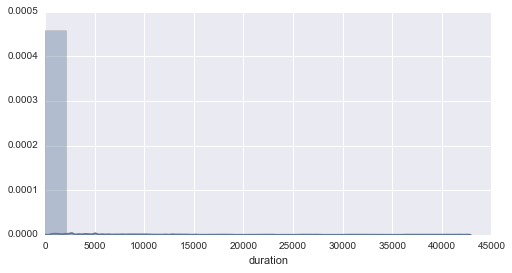

In [8]:
sns.distplot(conn.duration, bins=20);

##### Skew distribution -> log transformation

In [9]:
np.log(conn.duration+1).describe()

count    125973.000000
mean          0.321650
std           1.451379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.666837
Name: duration, dtype: float64

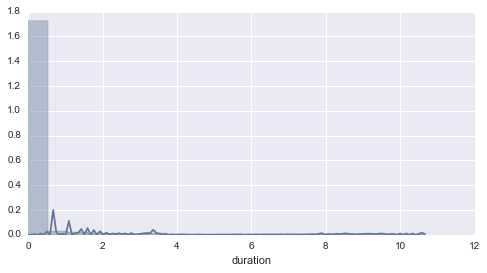

In [10]:
sns.distplot(np.log(conn.duration+1), bins=20);

##### Inspecting the distribution without 0's

In [11]:
np.log(conn.duration[conn.duration>0]+1).describe()

count    10018.000000
mean         4.044635
std          3.381028
min          0.693147
25%          1.098612
50%          2.772589
75%          7.658345
max         10.666837
Name: duration, dtype: float64

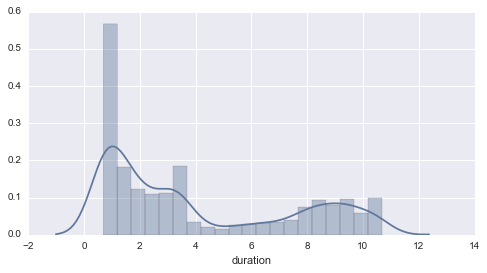

In [12]:
sns.distplot(np.log(conn.duration[conn.duration > 0]+1), bins=20);

In [13]:
print "Numbers of 0's in duration feature: ", len(conn.duration[conn.duration == 0])
print "The percentage of 0's in duration feature:", 100.0*len(conn.duration[conn.duration == 0])/len(conn.duration)

Numbers of 0's in duration feature:  115955
The percentage of 0's in duration feature: 92.0475022425


---

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

In [14]:
conn.protocol_type.describe()

count     125973
unique         3
top          tcp
freq      102689
Name: protocol_type, dtype: object

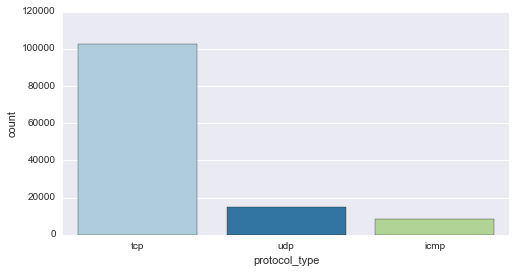

In [15]:
sns.countplot(x='protocol_type', data = conn, palette='Paired');

In [16]:
print "Percentages of protocol_type:"
100.0*conn.protocol_type.value_counts()/len(conn.protocol_type)

Percentages of protocol_type:


tcp     81.516674
udp     11.901757
icmp     6.581569
Name: protocol_type, dtype: float64

------------------------------

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

In [17]:
conn.service.describe()

count     125973
unique        70
top         http
freq       40338
Name: service, dtype: object

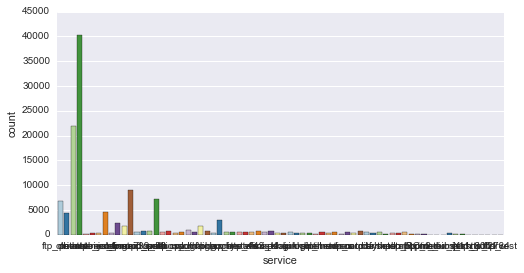

In [18]:
sns.countplot(x='service', data = conn, palette='Paired');

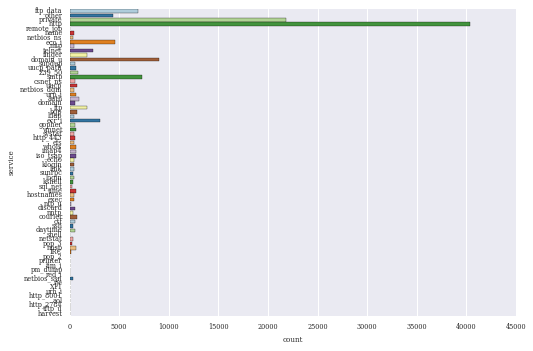

In [19]:
sns.set(font= 'serif', font_scale= 0.65)
sns.countplot(y='service', data=conn, palette='Paired');

In [20]:
print "Percentages of service's value:"
100.0*conn.service.value_counts()/len(conn.service)

Percentages of service's value:


http           32.021147
private        17.347368
domain_u        7.178522
smtp            5.805212
ftp_data        5.445611
eco_i           3.640463
other           3.460265
ecr_i           2.442587
telnet          1.867861
finger          1.402682
ftp             1.392362
auth            0.758099
Z39_50          0.684274
uucp            0.619180
courier         0.582665
bgp             0.563613
whois           0.550118
uucp_path       0.546943
iso_tsap        0.545355
time            0.519159
imap4           0.513602
nnsp            0.500107
vmnet           0.489787
urp_i           0.477880
domain          0.451684
ctf             0.446921
csnet_ns        0.432632
supdup          0.431839
discard         0.427076
http_443        0.420725
                 ...    
klogin          0.343724
login           0.340549
ldap            0.325467
netbios_dgm     0.321497
sunrpc          0.302446
netbios_ssn     0.287363
netstat         0.285776
netbios_ns      0.275456
ssh             0.246878


---

* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

In [21]:
conn.flag.describe()

count     125973
unique        11
top           SF
freq       74945
Name: flag, dtype: object

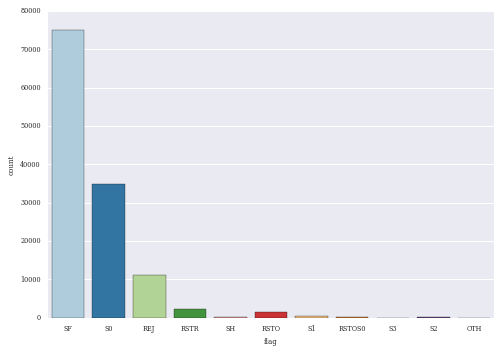

In [22]:
sns.countplot(x="flag", data=conn, palette="Paired");

In [23]:
conn.flag.value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [24]:
print "Percentages of flag's value:"
100.0*conn.flag.value_counts()/len(conn.flag)

Percentages of flag's value:


SF        59.492907
S0        27.665452
REJ        8.916990
RSTR       1.921840
RSTO       1.239948
S1         0.289745
SH         0.215125
S2         0.100815
RSTOS0     0.081764
S3         0.038897
OTH        0.036516
Name: flag, dtype: float64

---

* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

In [25]:
conn.src_bytes.describe()

count    1.259730e+05
mean     4.556674e+04
std      5.870331e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.760000e+02
max      1.379964e+09
Name: src_bytes, dtype: float64

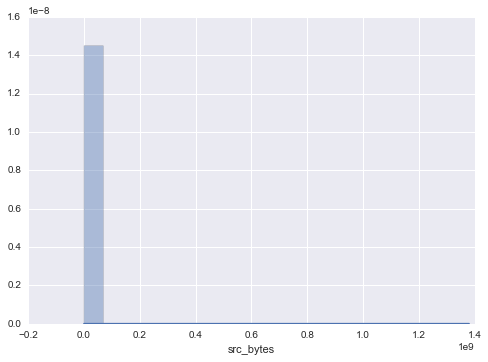

In [26]:
sns.set()
sns.distplot(conn.src_bytes, bins=20);

##### Skew distribution -> log transformation

In [27]:
np.log(conn.src_bytes+1).describe()

count    125973.000000
mean          3.229669
std           2.982191
min           0.000000
25%           0.000000
50%           3.806662
75%           5.624018
max          21.045323
Name: src_bytes, dtype: float64

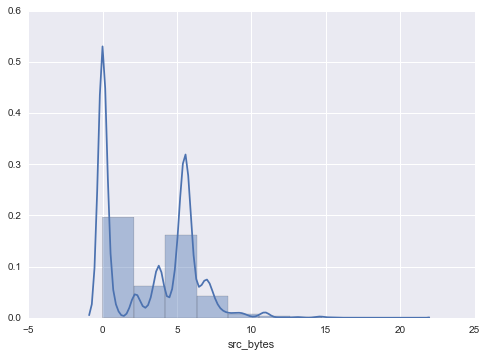

In [28]:
sns.distplot(np.log(conn.src_bytes+1), bins = 10);

---

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [29]:
np.log(conn.dst_bytes+1).describe()

count    125973.000000
mean          3.084400
std           3.548927
min           0.000000
25%           0.000000
50%           0.000000
75%           6.248043
max          20.993245
Name: dst_bytes, dtype: float64

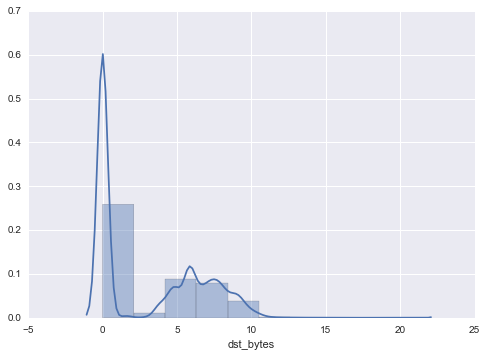

In [30]:
sns.distplot(np.log(conn.dst_bytes+1), bins = 10);

---

* **name:** land
* **description:** 1 if connection is from/to the same host/port; 0 otherwise
* **type:** discrete

In [31]:
conn.land.describe()

count    125973.000000
mean          0.000198
std           0.014086
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: land, dtype: float64

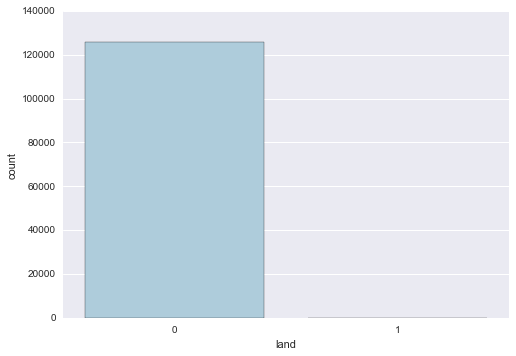

In [32]:
sns.countplot(x='land', data=conn, palette='Paired');

In [33]:
conn.land.value_counts()

0    125948
1        25
Name: land, dtype: int64

In [34]:
print "Percentages of lands's value:"
100.0*conn.land.value_counts()/len(conn.land)

Percentages of lands's value:


0    99.980154
1     0.019846
Name: land, dtype: float64

---

* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

In [35]:
conn.wrong_fragment.describe()

count    125973.000000
mean          0.022687
std           0.253530
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: wrong_fragment, dtype: float64

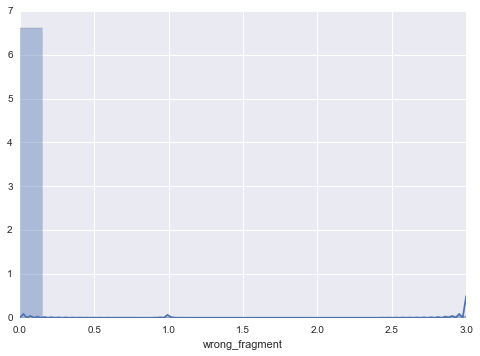

In [36]:
sns.distplot(conn.wrong_fragment, bins = 20);

In [37]:
conn.wrong_fragment.value_counts()

0    124883
3       884
1       206
Name: wrong_fragment, dtype: int64

In [38]:
print "Percentages of wrong_fragment's value:"
100.0*conn.wrong_fragment.value_counts()/len(conn.wrong_fragment)

Percentages of wrong_fragment's value:


0    99.134735
3     0.701738
1     0.163527
Name: wrong_fragment, dtype: float64

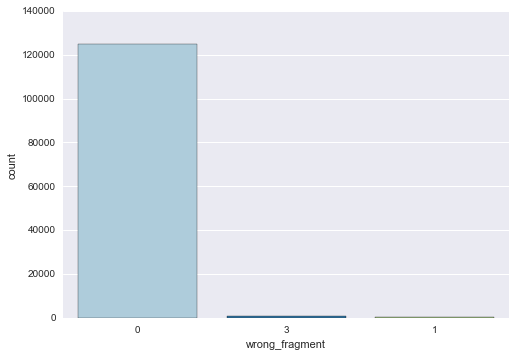

In [39]:
sns.countplot(x='wrong_fragment', data=conn, palette='Paired');

---

* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

In [40]:
conn.urgent.describe()

count    125973.000000
mean          0.000111
std           0.014366
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: urgent, dtype: float64

In [41]:
conn.urgent.value_counts()

0    125964
1         5
2         3
3         1
Name: urgent, dtype: int64

In [42]:
print "Percentages of urgent's value:"
100.0*conn.urgent.value_counts()/len(conn.urgent)

Percentages of urgent's value:


0    99.992856
1     0.003969
2     0.002381
3     0.000794
Name: urgent, dtype: float64

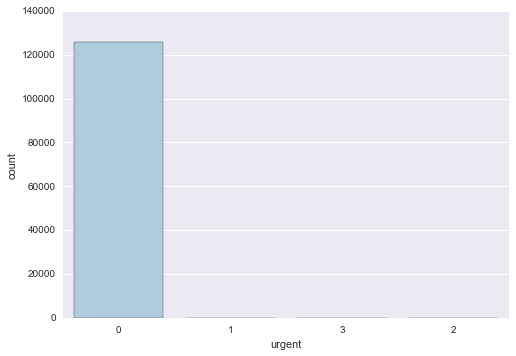

In [43]:
sns.countplot(x="urgent", data=conn, palette="Paired");

#### Conclusions: Univariate Analysis

The most relevant conclusions of univariante Analysis are:
* **duration:** is highly right-skewed. In fact the 92% of the values are 0's. The log transformation without 0's seems to have a bimodal distribution
* **connection_type:** has most of the instances with the values *tcp* (81%)
* **service:** only two values (*http* and *private*) of 70 concentrate the 50% of the instances
* **flag:** only three values (*SF*, *S0* and *REJ*) of 11 concentrate the 95% of the instances
* **src_bytes:** is right-skewed. The log transformation seems to have a bimodal distribution
* **dst_bytes:** is right-skewed. The log transformation seems to have a bimodal distribution
* **land:** actually is a discrete feature with two values: 0 and 1. The 99,98% of the instances have the value 0
* **wrong_fragment:** is a continuous variable with only three values: 0, 1 and 3. The 99.13% of the instances have the value 0
* **urgent:** is a continuous variable with only four values: 0, 1, 2 and 3. The 99.99% of the instances have the value 0


----------

### Bivariate Analysis

###duration vs protocol_type

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

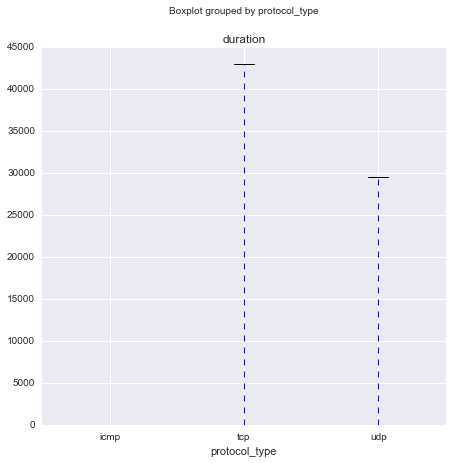

In [44]:
sns.set(rc={"figure.figsize": (7, 7)})
conn.boxplot('duration', by='protocol_type');

In [45]:
conn['duration_log'] = np.log(conn.duration+1)

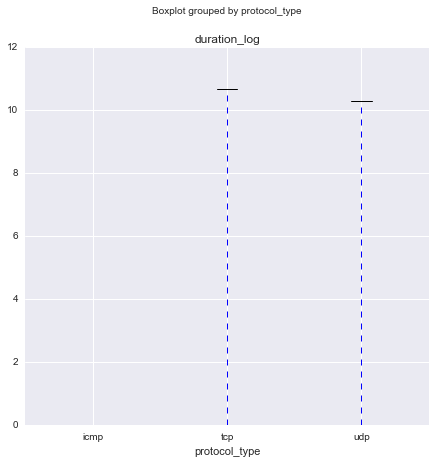

In [46]:
conn.boxplot('duration_log', by='protocol_type');

##### Inspecting the distribution with duration_log more than 0

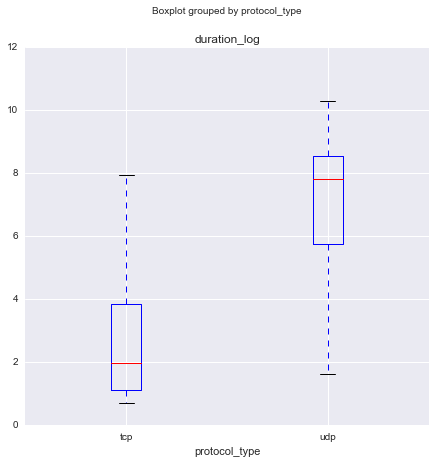

In [47]:
conn[conn.duration_log>0].boxplot('duration_log', by='protocol_type');

##### Inspecting the distribution with duration_log == 0

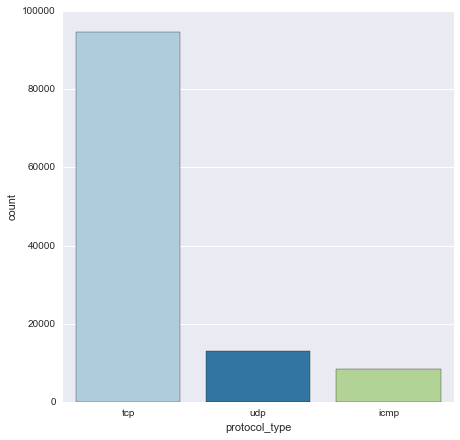

In [48]:
sns.countplot(x="protocol_type", data=conn[conn.duration_log==0], palette="Paired");

####Conclusions duration vs protocol_type analysis
* Regardless the *protocol_type* feature most of the values of *duration* features are 0's
* When the value of *protocol_type* is *'icmp'* all the values of *duration* features is 0
* After the log(x+1) transformation of *protocol_type* and removing the 0's values, the distributions of *duration* is very different between *'tcp'* and *'udp'* 




----------------------------------------------

### Exercise 1
Make the *duration* vs *service* analysis

----------

###duration vs service

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

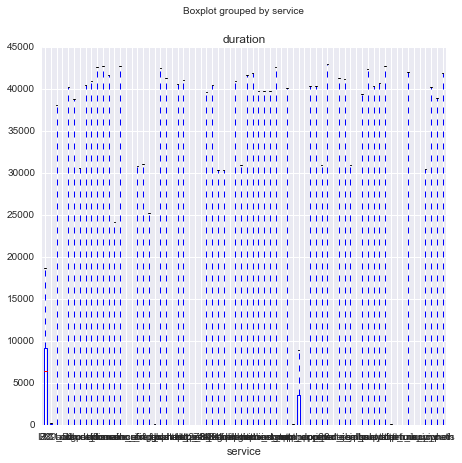

In [49]:
conn.boxplot('duration', by='service');

In [50]:
conn['duration_log'] = np.log(conn.duration+1)

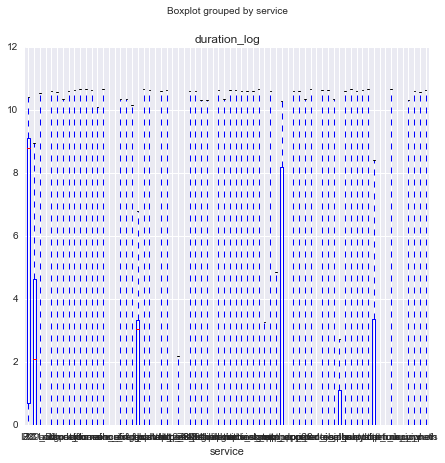

In [51]:
conn.boxplot('duration_log', by='service');

##### Inspecting the data with duration_log more than 0

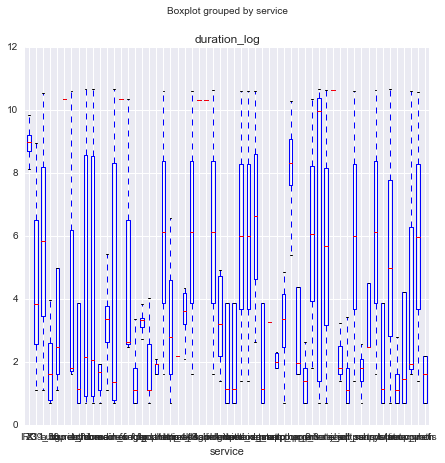

In [52]:
conn[conn.duration_log>0].boxplot('duration_log', by='service');

##### Inspecting the distribution with duration_log equal to 0

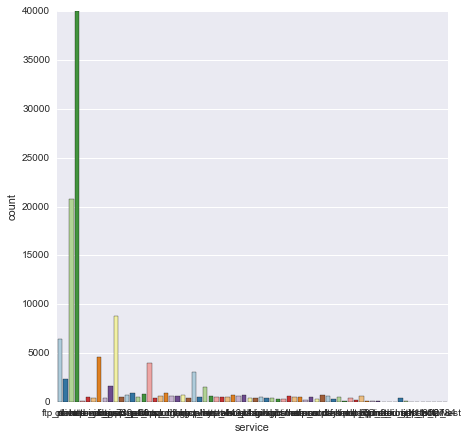

In [53]:
sns.countplot(x="service", data=conn[(conn.duration_log==0)], palette="Paired");

##### Inspecting the distribution with duration_log greater than 0

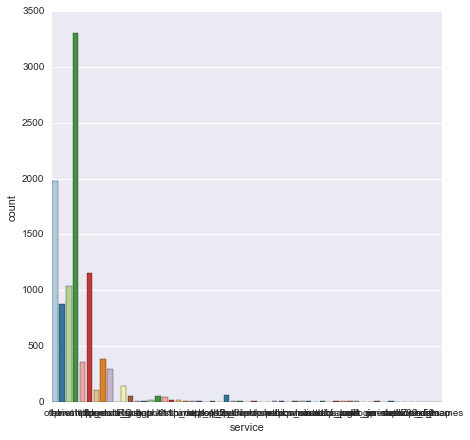

In [54]:
sns.countplot(x="service", data=conn[(conn.duration_log>0)], palette="Paired");

##### Inspecting the top 10 services distribution with duration_log equal to 0

In [55]:
top10services = conn.service.isin((100.0*conn.service.value_counts()/len(conn.service)).index[0:9])

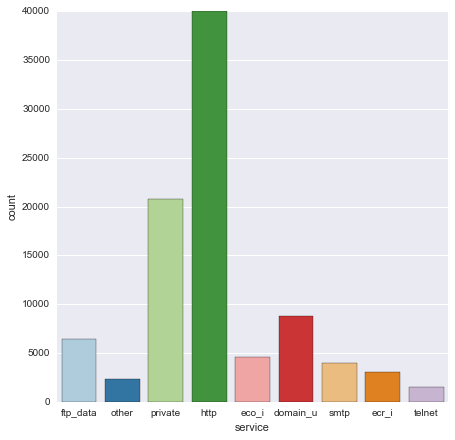

In [56]:
sns.countplot(x="service", data=conn[(conn.duration_log==0) & top10services], palette="Paired");

##### Inspecting the top 10 services distribution with duration_log greater than 0

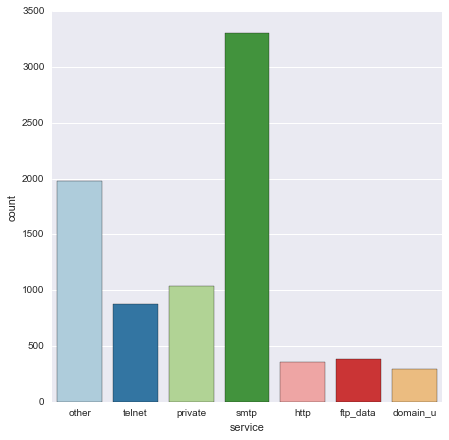

In [57]:
sns.countplot(x="service", data=conn[(conn.duration_log>0) & top10services], palette="Paired");

In [58]:
print "Percentages of service's with positive duration:"
conn[conn.duration_log > 0].service.value_counts()/conn[conn.duration_log == 0].service.value_counts()

Percentages of service's with positive duration:


IRC           3.155556
X11           1.607143
Z39_50        0.002326
aol                NaN
auth          0.055249
bgp           0.005666
courier       0.001364
csnet_ns      0.005535
ctf           0.007156
daytime       0.011650
discard       0.011278
domain        0.014260
domain_u      0.033250
echo          0.014019
eco_i              NaN
ecr_i              NaN
efs           0.002066
exec          0.006369
finger        0.064458
ftp           1.913621
ftp_data      0.059132
gopher        0.025743
harvest            NaN
hostnames     0.004367
http          0.008954
http_2784          NaN
http_443      0.001890
http_8001          NaN
imap4         0.009360
iso_tsap      0.002920
                ...   
netstat       0.011236
nnsp          0.001590
nntp          0.020690
ntp_u         0.135135
other         0.831513
pm_dump            NaN
pop_2         0.054054
pop_3         0.300493
printer       0.029851
private       0.049817
red_i              NaN
remote_job    0.026316
rje        

####Conclusions duration vs service analysis
* With the exception of *IRC, X11 and ftp* values for the *service* feature, most of the values of *duration* are 0's
* When *duration_log* feature is 0, *http and private* are the most common values for *service* feature
* When *duration_log* feature is not 0, *smtp and other* are the most common values for *service* feature





----------------------------------------------

### duration vs flag

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

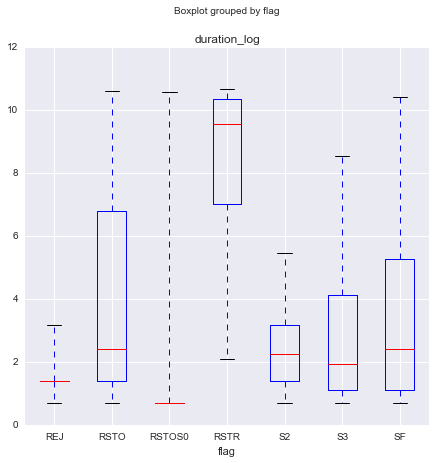

In [59]:
conn[conn.duration > 0].boxplot('duration_log', by='flag');

##### Inspecting the distribution with duration_log == 0

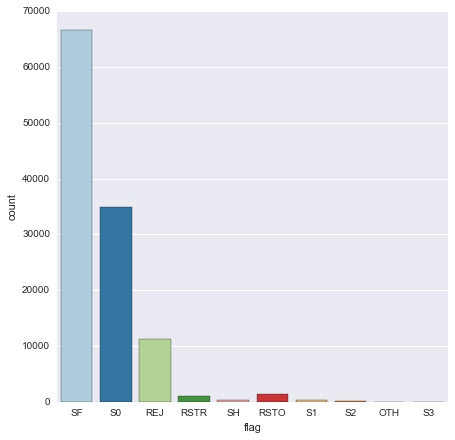

In [60]:
sns.countplot(x="flag", data=conn[conn.duration_log==0], palette="Paired");

In [61]:
print "Percentages of flag's value:"
100.0*conn[conn.duration_log == 0].flag.value_counts()/len(conn[conn.duration_log == 0].flag)

Percentages of flag's value:


SF      57.520590
S0      30.055625
REJ      9.633047
RSTO     1.266871
RSTR     0.824458
S1       0.314777
SH       0.233711
S2       0.085378
OTH      0.039671
S3       0.025872
Name: flag, dtype: float64

####Conclusions duration vs flag analysis
* Regardless the *flag* feature most of the values of *duration* features are 0's
* After the log(x+1) transformation of *flag* and removing the 0's values, the distributions of *duration* is very different in *'RSTR'* and *'RSTOS0'* categories 
* If duration_log is 0, only three values (*SF*, *S0* and *REJ*) of 11 concentrate the 96% of the instances


----------------------------------------------

### duration vs src_bytes

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

In [62]:
conn['src_bytes_log'] = np.log(conn.src_bytes+1)

**Inspecting with duration > 0 **

C:\Users\Alfonso\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


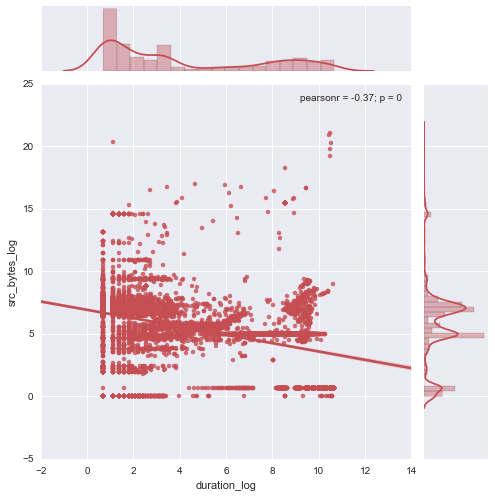

In [63]:
color = sns.color_palette()[2]
sns.jointplot("duration_log", "src_bytes_log", data=conn[conn.duration>0], 
              kind="reg", color = color, size=7);

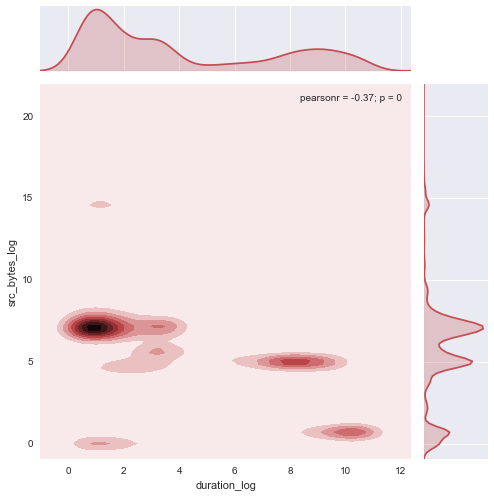

In [64]:
#with kde (Kernel density estimation)
color = sns.color_palette()[2]
sns.jointplot("duration_log", "src_bytes_log", data=conn[conn.duration>0], kind="kde", color = color, size=7);

**Inspecting with duration == 0 **

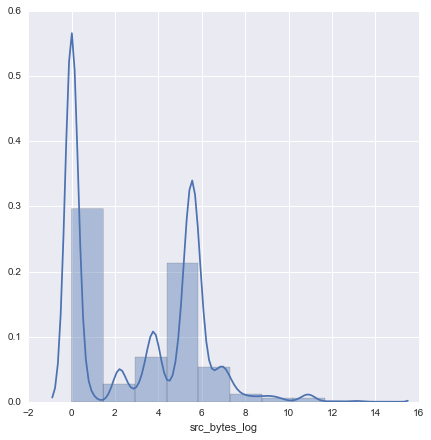

In [65]:
sns.distplot(conn[conn.duration_log == 0].src_bytes_log, bins = 10);

**Inspecting with src_bytes_log == 0 **

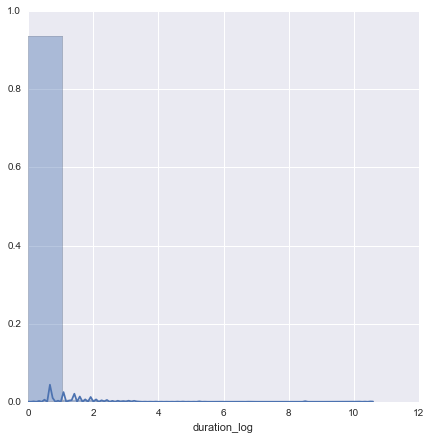

In [66]:
sns.distplot(conn[conn.src_bytes_log == 0].duration_log, bins = 10);

####Conclusions duration vs src_bytes analysis
The analysis was splited in three cases:
* Case 1: *duration_log* and *src_bytes_logs* are greater than 0:
    - There are not strong correlation between *duration_log* and *src_bytes_log*
    - On the other hand, it seems there are some clusters between both variables
* Case 2: *duration_log* is equal to 0:
    - It seems *src_bytes* has a multimodal distribution
* Case 3: *src_bytes_log* is equal to 0:
    - Most of the values of *duration_log* is equal to 0




----------------------------------------------

### duration vs dst_bytes

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [67]:
conn['dst_bytes_log'] = np.log(conn.dst_bytes+1)

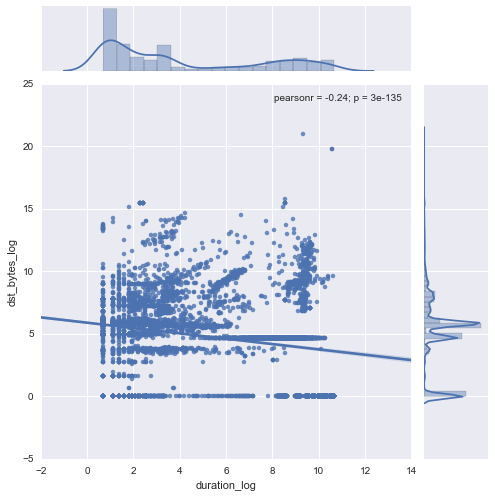

In [68]:
sns.jointplot("duration_log", "dst_bytes_log", data=conn[conn.duration>0], kind="reg", size=7);

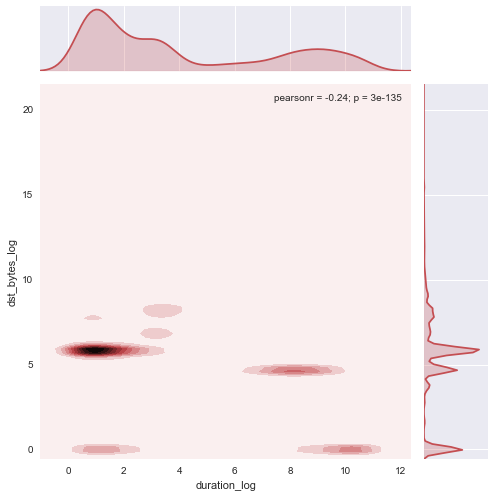

In [69]:
#with kde (Kernel density estimation)
color = sns.color_palette()[2]
sns.jointplot("duration_log", "dst_bytes_log", data=conn[conn.duration>0], color = color, kind="kde", size=7);

**Inspecting with duration == 0 **

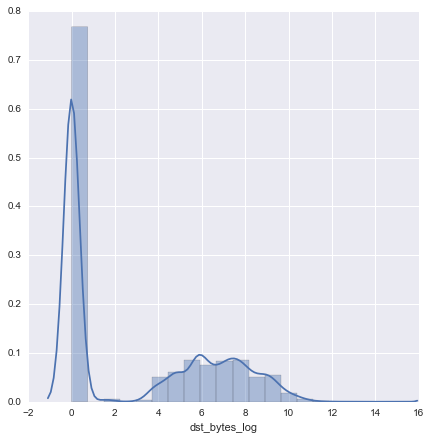

In [70]:
sns.distplot(conn[conn.duration_log == 0].dst_bytes_log, bins = 20);

**Inspecting with dst_bytes_log == 0 **

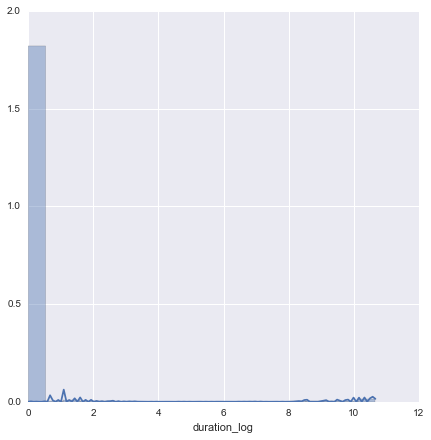

In [71]:
sns.distplot(conn[conn.dst_bytes_log == 0].duration_log, bins = 20);

####Conclusions duration vs dst_bytes analysis
The analysis was splited in three cases:
* Case 1: *duration_log* and *dst_bytes_logs* are greater than 0:
    - There are not strong correlation between *duration_log* and *dst_bytes_log*
    - On the other hand, it seems there are some clusters between both variables
* Case 2: *duration_log* is equal to 0:
    - It seems *dst_bytes* has a bimodal distribution
* Case 3: *dst_bytes_log* is equal to 0:
    - Most of the values of *duration_log* is equal to 0




----------------------------------------------

### duration vs land

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** land
* **description:** 1 if connection is from/to the same host/port; 0 otherwise
* **type:** discrete

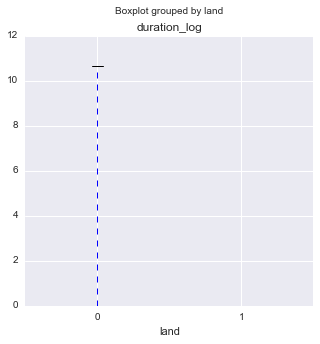

In [72]:
sns.set(rc={"figure.figsize": (5, 5)})
conn.boxplot('duration_log', by='land');

In [73]:
conn.pivot_table("duration_log","land", aggfunc=np.average)

land
0    0.321713
1    0.000000
Name: duration_log, dtype: float64

**Inspecting with duration > 0 **

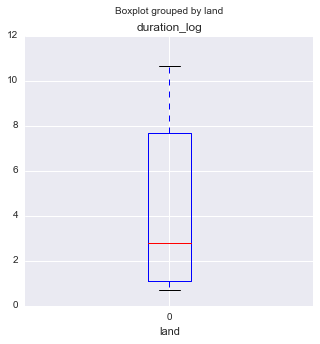

In [74]:
sns.set(rc={"figure.figsize": (5, 5)})
conn[conn.duration > 0].boxplot('duration_log', by='land');

####Conclusions duration vs land analysis
* If *duration_log* is greater than 0 then we have only values with *land* == 0 and its distribution is right-skewed




----------------------------------------------

### duration vs wrong_fragment

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

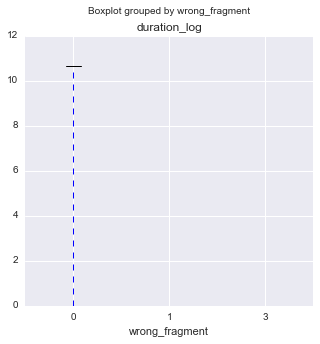

In [75]:
sns.set(rc={"figure.figsize": (5, 5)})
conn.boxplot('duration_log', by='wrong_fragment');

In [76]:
conn.pivot_table("duration_log","wrong_fragment", aggfunc=np.average)

wrong_fragment
0    0.324457
1    0.000000
3    0.000000
Name: duration_log, dtype: float64

**Inspecting with duration > 0 **

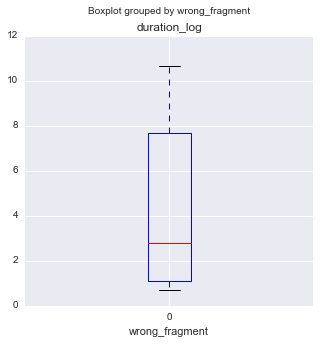

In [77]:
sns.set(rc={"figure.figsize": (5, 5)})
conn[conn.duration_log > 0].boxplot('duration_log', by='wrong_fragment');

####Conclusions duration vs wrong_fragment

* If *duration_log* is greater than 0 then we have only values with *wrong_fragment* == 0 and its distribution is right-skewed




----------------------------------------------

### Exercicie 2: duration vs urgent

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

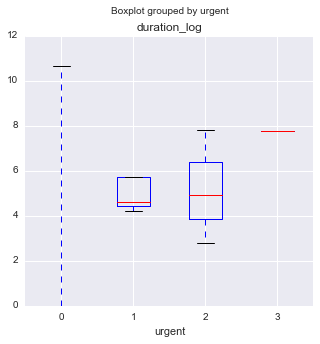

In [78]:
sns.set(rc={"figure.figsize": (5, 5)})
conn.boxplot('duration_log', by='urgent');

In [79]:
conn.pivot_table("duration_log","urgent", aggfunc=np.average)

urgent
0    0.321264
1    5.622527
2    5.169297
3    7.783224
Name: duration_log, dtype: float64

**Inspecting with duration > 0 **

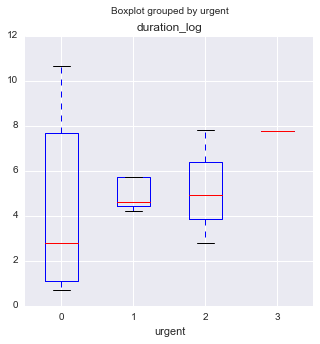

In [80]:
conn[conn.duration_log > 0].boxplot('duration_log', by='urgent');

####Conclusions duration vs urgent
* If *duration_log* is greater than 0 then we have *0, 1, 2 and 3* as typical values of *urgent* feature. *0 and 1* distributions are right-skewed, *2* is centered and *3* has no distribution.




----------------------------------------------

### protocol_type vs service

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

In [81]:
conn.pivot_table("class", "service","protocol_type", aggfunc=len)

protocol_type,icmp,tcp,udp
service,,,
IRC,NaN,187,NaN
X11,NaN,73,NaN
Z39_50,NaN,862,NaN
aol,NaN,2,NaN
auth,NaN,955,NaN
bgp,NaN,710,NaN
courier,NaN,734,NaN
csnet_ns,NaN,545,NaN
ctf,NaN,563,NaN


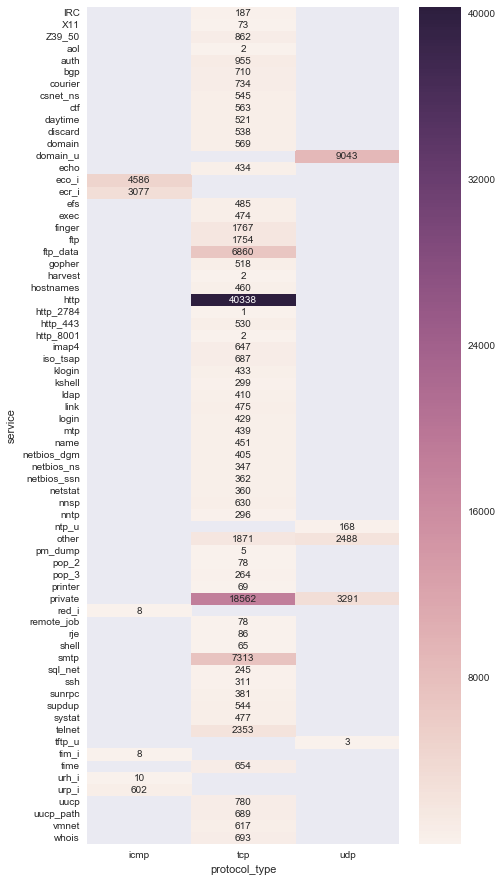

In [82]:
sns.set()
sns.set(context="paper", font="monospace")
sns.set(rc={"figure.figsize": (7, 15)})
sns.heatmap(conn.pivot_table("class", "service","protocol_type", aggfunc=len), annot=True, fmt=".0f");

####Conclusions protocol_type vs service analysis
* Except two general services (*'other'* and *'private'*) all the *services* categories belong to a *protocol_type* category




----------------------------------------------

###protocol_type vs flag

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

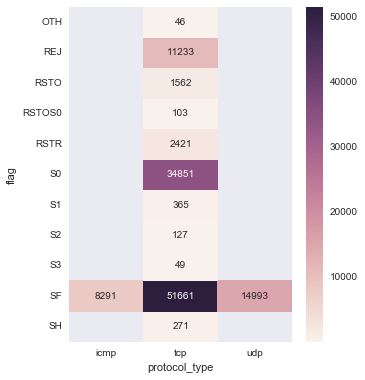

In [83]:
sns.set()
sns.set(context="paper", font="monospace")
sns.set(rc={"figure.figsize": (5, 6)})
sns.heatmap(conn.pivot_table("class", "flag","protocol_type", aggfunc=len), annot=True, fmt=".0f");

####Conclusions protocol_type vs flag analysis
* All *flag* categories beleng only to *'tcp'* *protocol_type* except *'SF'* flag that belongs to the three *protocol_type*s



----------------------------------------------

### Exercise 3: protocol_type vs src_bytes
Make the *protocol_type* vs *src_bytes* analysis

----------

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [84]:
conn['src_bytes_log'] = np.log(conn.src_bytes+1)

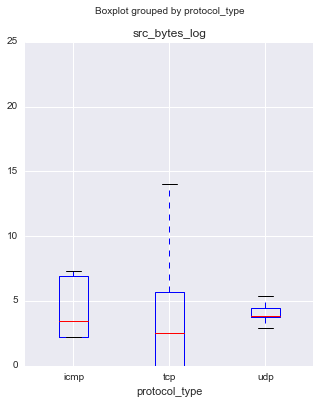

In [85]:
conn.boxplot('src_bytes_log', by='protocol_type');

##### Inspecting the distribution with src_bytes_log > 0

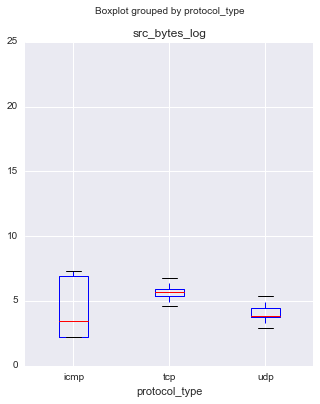

In [86]:
conn[conn.src_bytes_log > 0].boxplot('src_bytes_log', by='protocol_type');

####Conclusions protocol_type vs src_bytes analysis
* After the log(x+1) transformation of *src_bytes* and removing the 0's values, the distributions of *duration* is very different in *'udp'* , *'tcp'* and *'icmp'* categories 
* *'icmp'* and '*udp'* distributions are very right-skewed


----------------------------------------------

### Exercise 4: protocol_type vs dst_bytes
Make the *protocol_type* vs *dst_bytes* analysis

----------

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

In [87]:
conn['dst_bytes_log'] = np.log(conn.dst_bytes+1)

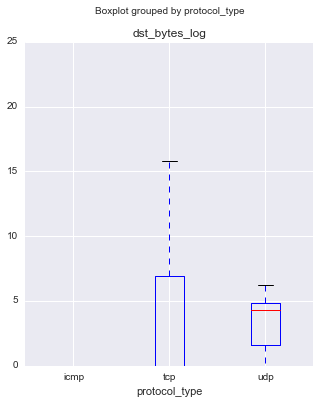

In [88]:
conn.boxplot('dst_bytes_log', by='protocol_type');

##### Inspecting the distribution with dst_bytes_log > 0

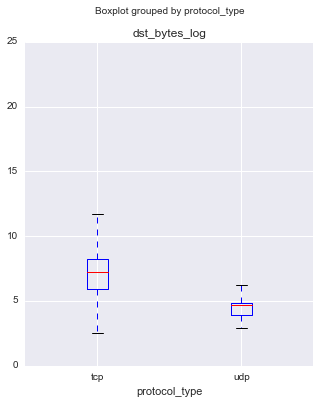

In [89]:
conn[conn.dst_bytes_log > 0].boxplot('dst_bytes_log', by='protocol_type');

####Conclusions protocol_type vs dst_bytes analysis
* After the log(x+1) transformation of *dst_bytes* and removing the 0's values, the distributions of *duration* is very different in *'udp'* and *'tcp'* 
* '*udp'* distribution is right-skewed


----------------------------------------------

### Multivariate Analysis

### src_bytes & dst_bytes & wrong_fragmnet & urgent vs class

* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

* **name:** class	
* **description:** is the label attribute and indicates which type of connections is each instance: normal or which attack. The values it can take are the following: *anomaly, dict, dict_simple, eject, eject-fail, ffb, ffb_clear, format, format_clear, format-fail, ftp-write, guest, imap, land, load_clear, loadmodule, multihop, perl_clear, perlmagic, phf, rootkit, spy, syslog, teardrop, warez, warezclient, warezmaster, pod, back, ip- sweep, neptune, nmap, portsweep, satan, smurf and normal*
* **type:** discrete

In [90]:
#creation of "is_attack" attribute to differentiate the normal connections vs attack connections
conn["is_attack"] = conn["class"].map(lambda x: int(x != "normal"))

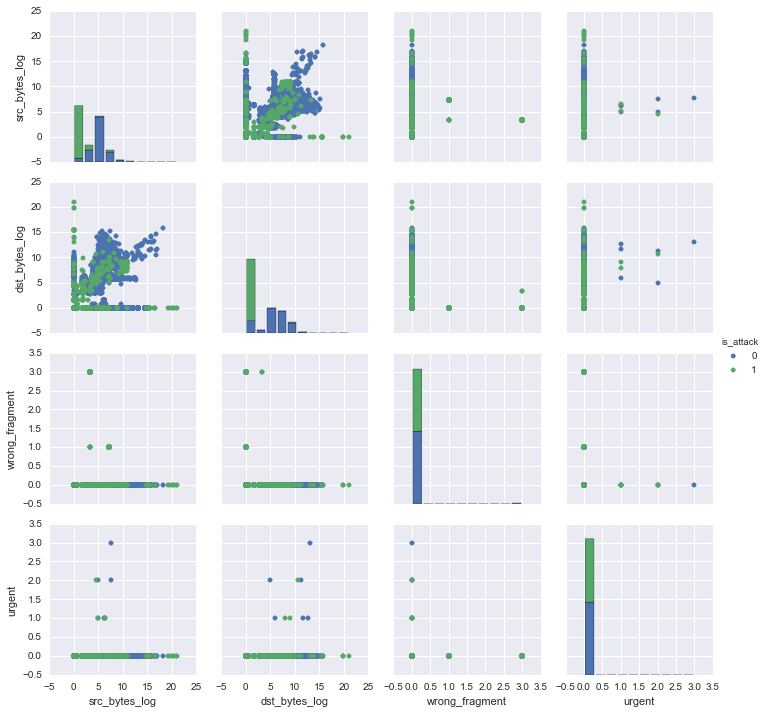

In [91]:
g = sns.PairGrid(conn, vars=['src_bytes_log','dst_bytes_log','wrong_fragment','urgent'], hue='is_attack')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()